<a href="https://colab.research.google.com/github/jakeTHEEsnak8/Computational-Physics/blob/main/ode/ode_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Runge-Kutta Methods for Numerical Integration

## 1st Order Runge Kutta:  Euler's Method

We already explored Euler's method in the previous tutorial. It turns out Euler's method is a first-order Runge Kutta integrator.

We'll once again solve the simple hamonic oscillator $F=ma$, where
$a=-(k/m)x.$

As before, we write this second-order equation as two first-order equations like this:
$$ \frac{dx}{dt} = v $$
$$ \frac{dv}{dt} = \frac{a}{m}. $$

In this example, we'll break our code into three functions and define them in separate Code Cells:
* derivative function:  `deriv_sho()`
* Euler integration:  `Euler()`
* plotting function:  `plot_solution()`

This approach will make it easier to change our our Euler integration scheme for higher-order integrators.

**Make sure you run each of these Code Cells.**



### **Derivative Function**
* This function will return the derivatives $\frac{dx}{dt}=v$ and $\frac{dv}{dt}=-\frac{k}{m}x$ as a 1x2 NumPy array.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#########  SHO Derivative Function  #########
#
# This function returns the derivatives for the Simple Harmoni Oscillator
#      dx/dt = v     dv/dt = -(k/m) x
#
# Passed parameters:
#   t = time
#   y = 1x2 array containing position (x) and velocity (v)
#   m = mass
#   k = spring constant
#
# Returned values:
#   dydt = 1x2 array containing the derivatives dx/dt and dv/dt

def deriv_sho(t, y, m, k):

    # extract variables from y array
    x = y[0]          # position
    v = y[1]          # velocity

    # calculate derivatives
    dxdt = v
    dvdt = -(k/m)*x

    # return derivatives in a numpy array
    return np.array([dxdt, dvdt])


### **Euler Integration**
* This function will integrate a system of ODEs using the Euler Method.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#########  Euler Integration  #########
#
# This function integrates an ODE specified by a passed derivative function
#
# Passed parameters:
#   deriv  = function created by the user that returns the derivatives for the system of ODEs
#   y0     = 1xN array containing initial conditions
#   tmax   = maximum time to run the integration
#   dt     = time step
#   params = 1xM array containing parameters for the derivative function
#
# Returned values:
#   t      = 1D array containing time values of the solution
#   y      = 2D array whose columns are the solutions for each variable

def Euler(deriv, y0, tmax, dt, params):

    #########  Create Arrays  #########

    # determine the number of variables in the system from initial conditions
    nvar = 1 if not isinstance(y0, np.ndarray) else y0.size

    N = int(tmax/dt)+1         # number of steps in simulation
    y = np.zeros((N,nvar))     # array to store y values
    t = np.zeros(N)            # array to store times

    if nvar == 1:
        y[0] = y0              # assign initial value if single variable
    else:
        y[0,:] = y0            # assign vector initial values if multivariable

    #########  Loop to implement the Euler update rule  #########

    for n in range(N-1):
        f = deriv(t[n], y[n], *params)
        y[n+1] = y[n] + f*dt
        t[n+1] = t[n] + dt

    return t, y




### **Plotting Function**
* This function plots the results of the numerical integration along with the analytic solution and the absolute error.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#########  Plot Results  #########
#
# This function plots the results of the numerical integration along with
# the analytic solution and the absolute error
#
# Passed parameters:
#   x      = 1D array containing the numerical solution
#   x_true = 1D array containing the analytic solution
#   t      = 1D array containing the times
#   title  = text string containing a message to print for the title
#   style  = style for plotting, default valus is to connect data points
#            with a straight line. This parameter is optional
#
# Returned values:
#   none
#
# Action:
#   top plot:    plot of numerical solution vs time overlayed with the analytic solution
#   lower plot:  error between numerical and analytic solutions
#
def plot_solution(x, x_true, t, title, style="-"):

    err = np.abs(x-x_true)     # calculate numerical error

    #########  Plot Solution  #########

    plt.subplot(2,1,1)                           # upper subplot
    plt.plot(t, x, style, label='Numerical')            # plot position
    plt.plot(t, x_true, '--', label='Analytic')  # analytic solution

    plt.xlabel('t')            # label the x and y axes
    plt.ylabel('x')
    plt.title(title)           # give the plot a title
    plt.legend()               # display the legend

    #########  Plot Error  #########

    plt.subplot(2,1,2)         # lower subplot
    plt.plot(t, err, style)           # plot position
    plt.xlabel('t')            # label the x and y axes
    plt.ylabel('error')

    plt.show()                       # display the plot

### **Putting it all together**
* This is the code that defines the system parameters and calls the functions above. It performs the numerical integration of the simple harmonic oscillator ODE using Euler's method and plots the results


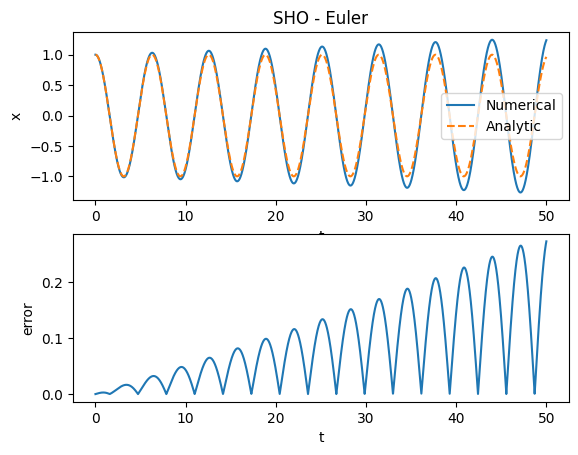

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

###########  Numerically Integrate the S.H.O. Using Euler's Method  ###########

#########  Parameters  #########

m    = 1         # mass
k    = 1         # spring constant
tmax = 50        # maximum time
dt   = 0.01      # time step
x0   = 1         # initial position
v0   = 0         # initial velocity

params = np.array([m,k])    # bundle derivative parameters together
y0 = np.array([x0,v0])      # bundle initial conditions together


#########  Perform Euler Integration  #########

t, y =  Euler(deriv_sho, y0, tmax, dt, params)

x = y[:,0]       # extract positions
v = y[:,1]       # extract velocities

#########  Analytic Solution  #########

omega = np.sqrt(k/m)
x_true = x0 * np.cos(omega*t)

#########  Plot Solution  #########

plot_solution(x, x_true, t, "SHO - Euler")




## Midpoint Method (2nd Order)

The Midpoint method is a second-order accurate Runge-Kutta integration method. The Midpoint update rule splits a full time step into two half steps and makes two derivative function calls. Because of this, the Midpoint method is more computationally expensive compared with the Euler method (for the same size time step), it is second-order accurate meaning the error scales with $\Delta t^2$ instead of $\Delta t$. Thus, reducing the time step by a factor of $10\times$ reduces the error by a factor of $100\times$. This more than makes up for the added computation per time step.

$$y_{n+1/2}=y_n +f(y_{n},t_n)  \frac{\Delta t}{2}$$
$$y_{n+1}=y_n +f(y_{n+1/2},t_{n+1/2})  \Delta t.$$

### **Midpoint Function**


### ✅ Skill Check 1

The following function, called `Midpoint` is a copy of the `Euler()` function. Only the part that has changed are the 4 lines marked `YOUR CODE HERE`.
* Based on the Midpoint rules above (or from the lecture notes) enter code on these 4 lines to create a midpoint method.
* ONLY change the lines indicated by the comments. Please do not change any other parts of this function.
* After you have modified the `Midpoint()` function run the following Code Cell to numerically integrate the simple harmonic oscillator ODE using the Midpoint method.
* How does the residual error compare with the Euler Method?
* Notice:  you didn't have to change anything about the derivative function or the plotting function!!  This is the beauty of using functions to make your code modular!!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#########  Midpoint Integration  #########

def Midpoint(deriv, y0, tmax, dt, params):

    #########  Create Arrays  #########

    # determine the number of variables in the system from initial conditions
    nvar = 1 if not isinstance(y0, np.ndarray) else y0.size

    N = int(tmax/dt)+1         # number of steps in simulation
    y = np.zeros((N,nvar))     # array to store y values
    t = np.zeros(N)            # array to store times

    if nvar == 1:
        y[0] = y0              # assign initial value if single variable
    else:
        y[0,:] = y0            # assign vector initial values if multivariable

    #########  Loop to implement the Midpoint update rule  #########

    for n in range(N-1):
        f =   deriv_sho(t[n],y[n], *params )   # YOUR CODE HERE     # evaluate derivatives on whole step
        y_half =  y[n]+ f * dt/2  # YOUR CODE HERE     # half step
        f_half = deriv_sho(t[n]+dt/2, y_half, *params)   # YOUR CODE HERE     # evaluate derivatives on half step
        y[n+1] = y[n] + f*dt   # YOUR CODE HERE     # whole step
        t[n+1] = t[n] + dt

    return t, y



Run the following Code Cell after you modify the `Midpoint()` function above.

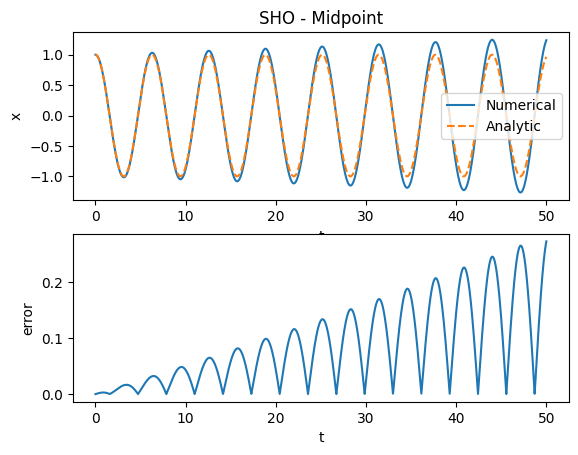

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#########  Parameters  #########

m    = 1         # mass
k    = 1         # spring constant
tmax = 50        # maximum time
dt   = 0.01      # time step
x0   = 1         # initial position
v0 = 0           # initial velocity

params = np.array([m,k])    # bundle derivative parameters together
y0 = np.array([x0,v0])      # bundle initial conditions together


#########  Perform Euler Integration  #########

t, y =  Midpoint(deriv_sho, y0, tmax, dt, params)

x = y[:,0]       # extract positions
v = y[:,1]       # extract velocities

#########  Analytic Solution  #########

omega = np.sqrt(k/m)
x_true = x0 * np.cos(omega*t)

#########  Plot Solution  #########

plot_solution(x, x_true, t, "SHO - Midpoint")



## RK4 Method (4th Order)

The 4th-order Runge-Kutta method (often called RK4) is calculated by making a series of approximations to the derivative. Rather than trying to motivate it using geometry, we just present the result:

$$k_1=f(t_n,y_n)$$
$$k_2=f\left(t_n+\frac{\Delta t}{2},y_n+\frac{k_1}{2}\Delta t\right)$$
$$k_3=f\left(t_n+\frac{\Delta t}{2},y_n+\frac{k_2}{2}\Delta t\right)  $$
$$k_4=f\left(t_n+\Delta t,y_n+k_3\Delta t\right) $$
$$y_{n+1}=y_n + \frac{\Delta t}{6}\left(k_1 + 2k_2 + 2 k_3 +k_4 \right) $$

### ✅ Skill Check 2

The following function, called `RK4` is a copy of the `Midpoint()` function. Only the part that has changed are the 5 lines marked `YOUR CODE HERE`.
* Based on the RK4 rules above (or from the lecture notes) enter code on these 4 lines to create a midpoint method.
* ONLY change the lines indicated by the comments. Please do not change any other parts of this function.
* After you have modified the `RK4()` function run the following Code Cell to numerically integrate the simple harmonic oscillator ODE using the RK4 method.
* How does the residual error compare with the Euler and Midpoint Methods?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#########  4th Order Runge-Kutta Integration  #########

def RK4(deriv, y0, tmax, dt, params):

    #########  Create Arrays  #########

    # determine the number of variables in the system from initial conditions
    nvar = 1 if not isinstance(y0, np.ndarray) else y0.size

    N = int(tmax/dt)+1         # number of steps in simulation
    y = np.zeros((N,nvar))     # array to store y values
    t = np.zeros(N)            # array to store times

    if nvar == 1:
        y[0] = y0              # assign initial value if single variable
    else:
        y[0,:] = y0            # assign vector initial values if multivariable

    #########  Loop to implement the Euler update rule  #########

    for n in range(N-1):
        k1 =  deriv(t[n],y[n], *params)     # YOUR CODE HERE
        k2 =  deriv(t[n],y[n]+ 2*k1, *params) *dt     # YOUR CODE HERE
        k3 =  deriv(t[n],y[n]+ 2*k2, *params) *dt# YOUR CODE HERE
        k4 = deriv(t[n], y[n]+ k3, *params) *dt    # YOUR CODE HERE
        y[n+1] = y[n]+ (1/6) * (k1 + 2*k2 + 2*k3 +k4)   # YOUR CODE HERE

        t[n+1] = t[n] + dt

    return t, y




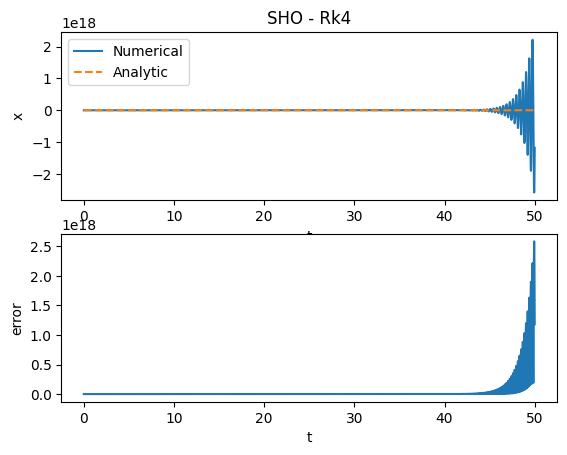

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

###########  Numerically Integrate the S.H.O. Using Euler's Method  ###########

#########  Parameters  #########

m    = 1         # mass
k    = 1         # spring constant
tmax = 50        # maximum time
dt   = 0.01      # time step
x0   = 1         # initial position
v0   = 0         # initial velocity

params = np.array([m,k])    # bundle derivative parameters together
y0 = np.array([x0,v0])      # bundle initial conditions together


#########  Perform Euler Integration  #########

t, y =  RK4(deriv_sho, y0, tmax, dt, params)

x = y[:,0]       # extract positions
v = y[:,1]       # extract velocities

#########  Analytic Solution  #########

omega = np.sqrt(k/m)
x_true = x0 * np.cos(omega*t)

#########  Plot Solution  #########

plot_solution(x, x_true, t, "SHO - Rk4")




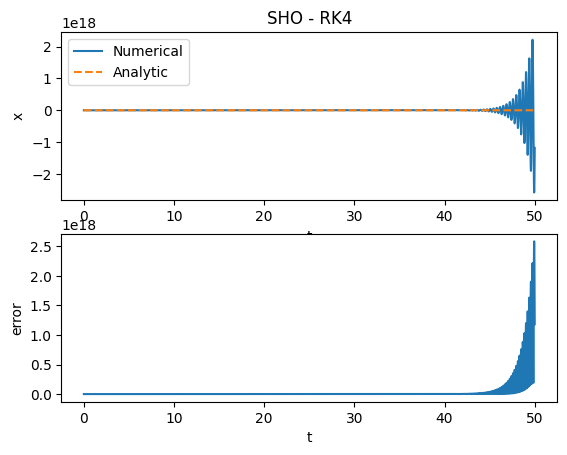

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#########  Parameters  #########

m    = 1         # mass
k    = 1         # spring constant
tmax = 50        # maximum time
dt   = 0.01      # time step
x0   = 1         # initial position
v0 = 0           # initial velocity

params = np.array([m,k])    # bundle derivative parameters together
y0 = np.array([x0,v0])      # bundle initial conditions together


#########  Perform Euler Integration  #########

t, y =  RK4(deriv_sho, y0, tmax, dt, params)

x = y[:,0]       # extract positions
v = y[:,1]       # extract velocities

#########  Analytic Solution  #########

omega = np.sqrt(k/m)
x_true = x0 * np.cos(omega*t)

#########  Plot Solution  #########

plot_solution(x, x_true, t, "SHO - RK4")



### ✅ Skill Check 3

Use your RK4 function to solve for the motion of a rigid pendulum. The equation of motion is $$\frac{d\phi}{dt} = -\frac{g}{L} \sin(\phi)$$
where
* $\phi = $ angle of the pendulum measured from the bottom of its swing
* $g = 9.8$ m/s is the acceleration of gravity
* $L = $ length of the pendulum

Specs:
* Use your RK4 function to numerically integrate the motion of the pendulum for the following three initial conditions.
* For each plot the angle $\phi$ in degrees as a function of time.
* Choose a value for the length $L$.
* Choose a maximum time to be the same for each plot and make sure each plot shows at least one complete oscillation.

Initial conditions:
* $\phi_0 = 45^\circ$
* $\phi_0 = 90^\circ$
* $\phi_0 = 135^\circ$
* $\phi_0 = 179^\circ$

Describe what happens as the initial release angle approaches $180^\circ$.
You can display your graphs however you like, i.e. with subplots, separate graphs or all on one plot. However, make sure you label each with the initial angle in degrees.



In [ ]:
# Your code here